# BUILD AN INVESTMENT PORTOFOLIO IN R

In [4]:
install.packages("DEoptim",repos='http://cran.us.r-project.org')

package 'DEoptim' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\luigi\AppData\Local\Temp\RtmpE1G4iP\downloaded_packages


In [5]:
library(PerformanceAnalytics)
library(PortfolioAnalytics)
library(quantmod)
library(DEoptim)

Loading required package: parallel

DEoptim package
Differential Evolution algorithm in R
Authors: D. Ardia, K. Mullen, B. Peterson and J. Ulrich



In [48]:
symbol_list=c("AMGN","AAPL","FB","AAL","AMD","MSFT","MAT","TSLA")
getSymbols(symbol_list,from="2015-01-01")
getSymbols("^NDX", from="2015-01-01")

pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols


[1] "AMGN" "AAPL" "FB"   "AAL"  "AMD"  "MSFT" "MAT"  "TSLA"

[1] "NDX"

In [49]:
asset_matrix=NULL
for( sym in symbol_list){
asset_matrix =
merge.xts(asset_matrix,
Return.calculate(Ad(get(paste(sym))),
method='discrete'))}
asset_matrix=asset_matrix[complete.cases(asset_matrix)]
NDAQReturn=Return.calculate(Ad(NDAQ),method='discrete')

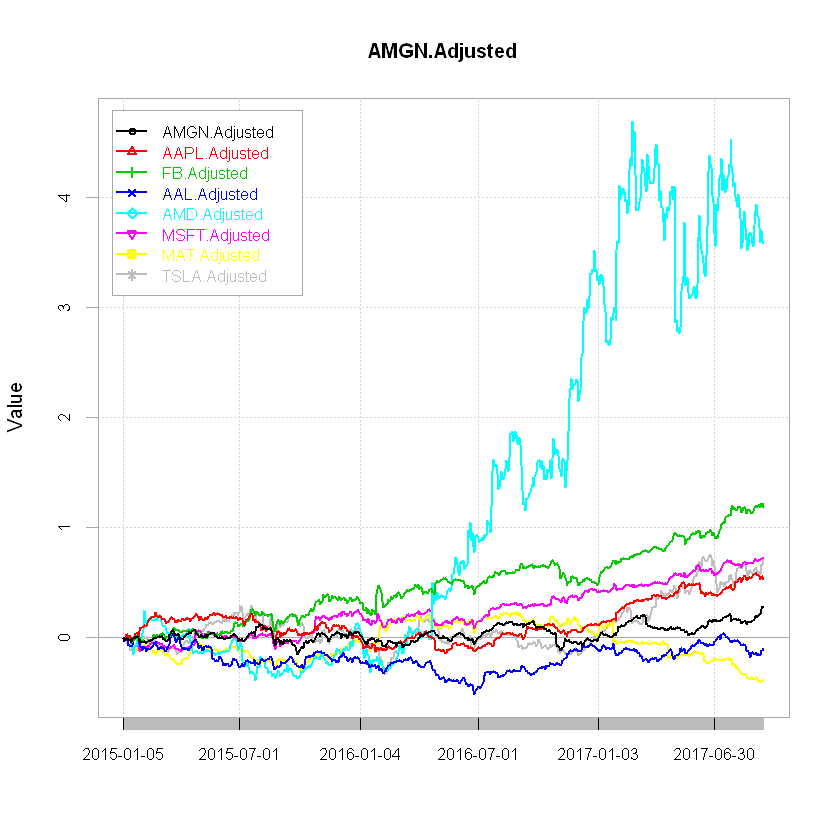

In [73]:
chart.CumReturns(asset_matrix,legend.loc ="topleft")

In [ ]:
MinimumVariancePortfolio=portfolio.spec(assets=colnames(asset_matrix))
MinimumVariancePortfolio=add.objective(portfolio=MinimumVariancePortfolio,type='risk',name='StdDev')

In [52]:
MinimumVariancePortfolio=add.constraint(portfolio = MinimumVariancePortfolio,type="full_investment")
MinimumVariancePortfolio=add.constraint(portfolio = MinimumVariancePortfolio,type="long_only")
MinimumVariancePortfolio=add.constraint(portfolio = MinimumVariancePortfolio,type="box",min=0,max=0.5)

In [53]:
OptimizedPortfolioMinVariance=optimize.portfolio(R=asset_matrix,portfolio=MinimumVariancePortfolio,
trace=TRUE)

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.011684 bestmemit:    0.170000    0.346000    0.012000    0.004000    0.070000    0.208000    0.074000    0.116000
Iteration: 2 bestvalit: 0.011684 bestmemit:    0.170000    0.346000    0.012000    0.004000    0.070000    0.208000    0.074000    0.116000
Iteration: 3 bestvalit: 0.011684 bestmemit:    0.170000    0.346000    0.012000    0.004000    0.070000    0.208000    0.074000    0.116000
Iteration: 4 bestvalit: 0.011682 bestmemit:    0.016000    0.134000    0.092000    0.142000    0.078000    0.312000    0.164000    0.062000
Iteration: 5 bestvalit: 0.011518 bestmemit:    0.042000    0.324000    0.042000    0.070000    0.008000    0.416000    0.086000    0.012000
Iteration: 6 bestvalit: 0.011196 bestmemit:    0.018000    0.334000    0.098000    0.076000    0.024000    0.266000    0.140000    0.044000
Iteration: 7 bestvalit: 0.011196 bestmemit:    0.018000    0.334000    0.098000    0.076000    0.024000    0.266000    0.140000    0.044000
Iteration: 8 bestval

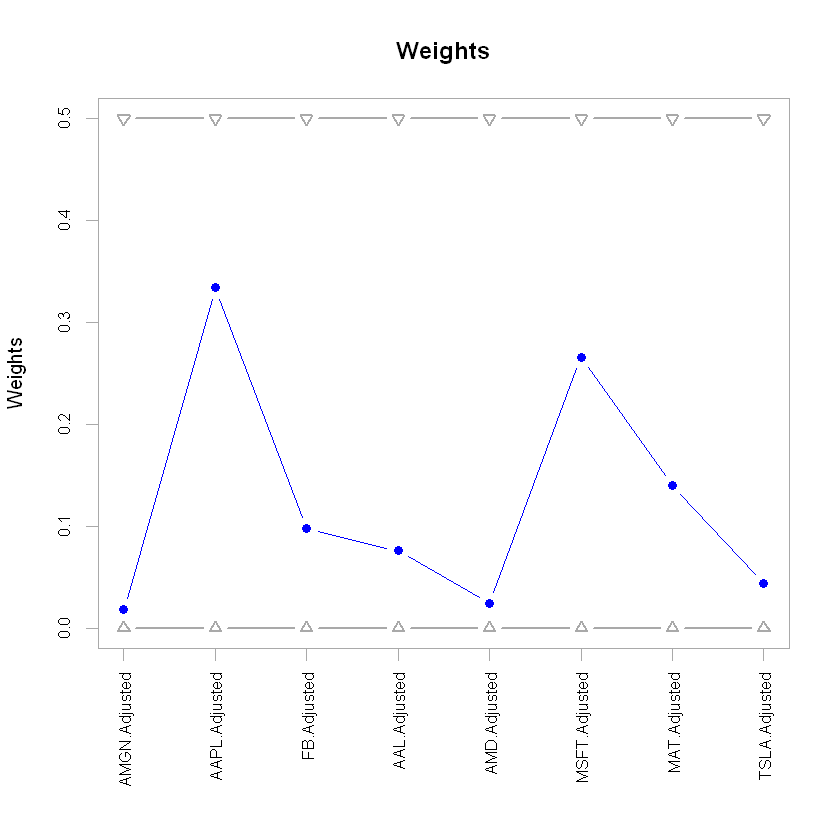

In [54]:
chart.Weights(OptimizedPortfolioMinVariance)

In [55]:
MeanVariancePortfolio=add.objective(portfolio=MinimumVariancePortfolio,type='return',name='mean')

In [56]:
OptimizedPortfolioMeanVariance=optimize.portfolio(R=asset_matrix,portfolio=MeanVariancePortfolio,
trace=TRUE)

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.010843 bestmemit:    0.004000    0.206000    0.376000    0.090000    0.006000    0.044000    0.256000    0.018000
Iteration: 2 bestvalit: 0.010843 bestmemit:    0.004000    0.206000    0.376000    0.090000    0.006000    0.044000    0.256000    0.018000
Iteration: 3 bestvalit: 0.010843 bestmemit:    0.004000    0.206000    0.376000    0.090000    0.006000    0.044000    0.256000    0.018000
Iteration: 4 bestvalit: 0.010843 bestmemit:    0.004000    0.206000    0.376000    0.090000    0.006000    0.044000    0.256000    0.018000
Iteration: 5 bestvalit: 0.010843 bestmemit:    0.004000    0.206000    0.376000    0.090000    0.006000    0.044000    0.256000    0.018000
Iteration: 6 bestvalit: 0.010367 bestmemit:    0.194000    0.298000    0.210000    0.074000    0.000000    0.028000    0.124000    0.072000
Iteration: 7 bestvalit: 0.010367 bestmemit:    0.194000    0.298000    0.210000    0.074000    0.000000    0.028000    0.124000    0.072000
Iteration: 8 bestval

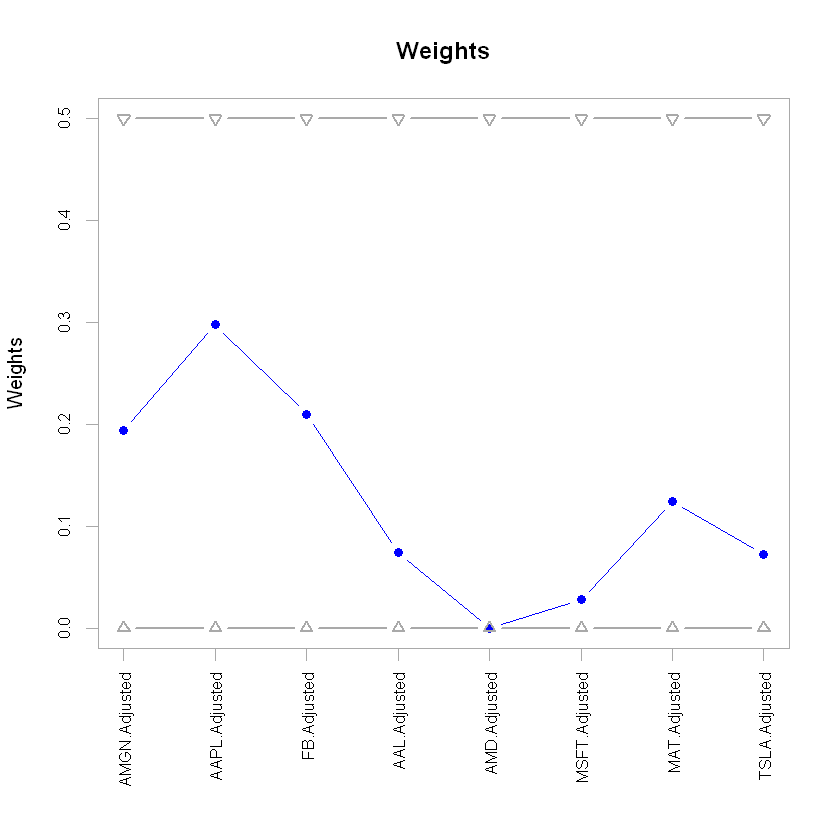

In [57]:
chart.Weights(OptimizedPortfolioMeanVariance)

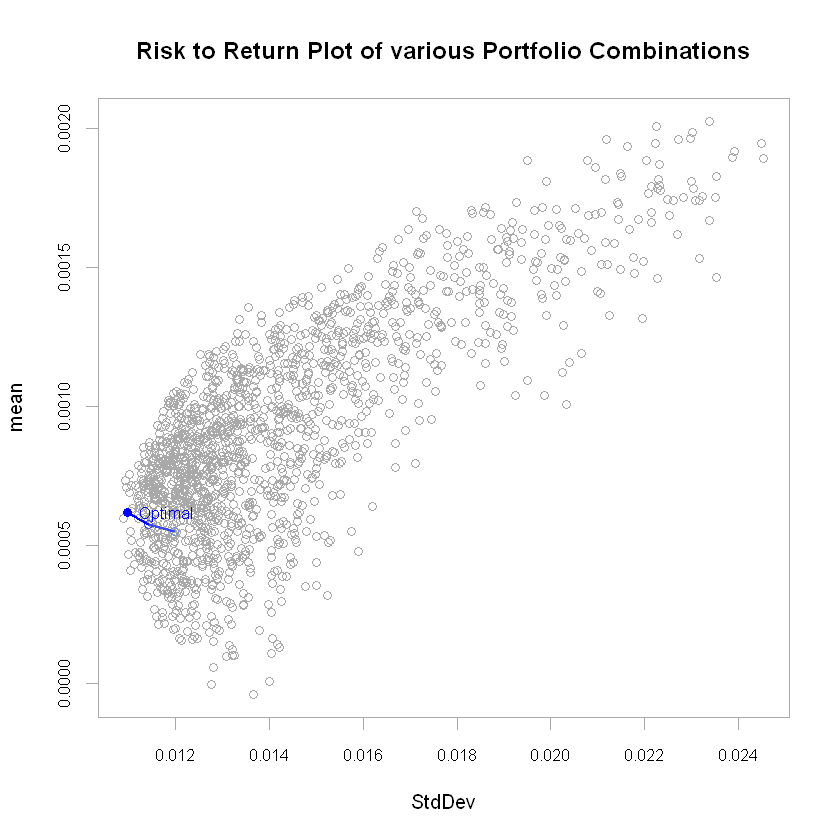

In [58]:
chart.RiskReward(OptimizedPortfolioMeanVariance,return.col = 'mean',risk.col = 'StdDev',
main='Risk to Return Plot of various Portfolio Combinations')

In [60]:
MinimumVarianceBT=optimize.portfolio.rebalancing(R=asset_matrix,
MinimumVariancePortfolio,
rebalance_on = 'month',
training_period = 21,
rolling_window = 21)

Warning message in if (optimize_method == "random") {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.008967 bestmemit:    0.134000    0.366000    0.050000    0.086000    0.004000    0.064000    0.202000    0.094000
Iteration: 2 bestvalit: 0.007226 bestmemit:    0.218000    0.100000    0.304000    0.002000    0.014000    0.004000    0.314000    0.044000
Iteration: 3 bestvalit: 0.007226 bestmemit:    0.218000    0.100000    0.304000    0.002000    0.014000    0.004000    0.314000    0.044000
Iteration: 4 bestvalit: 0.007226 bestmemit:    0.218000    0.100000    0.304000    0.002000    0.014000    0.004000    0.314000    0.044000
Iteration: 5 bestvalit: 0.007226 bestmemit:    0.218000    0.100000    0.304000    0.002000    0.014000    0.004000    0.314000    0.044000
Iteration: 6 bestvalit: 0.007226 bestmemit:    0.218000    0.100000    0.304000    0.002000    0.014000    0.004000    0.314000    0.044000
Iteration: 7 bestvalit: 0.007226 bestmemit:    0.218000    0.100000    0.304000    0.002000    0.014000    0.004000    0.314000    0.044000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.010933 bestmemit:    0.024000    0.418000    0.026000    0.048000    0.012000    0.090000    0.188000    0.194000
Iteration: 2 bestvalit: 0.010933 bestmemit:    0.024000    0.418000    0.026000    0.048000    0.012000    0.090000    0.188000    0.194000
Iteration: 3 bestvalit: 0.010933 bestmemit:    0.024000    0.418000    0.026000    0.048000    0.012000    0.090000    0.188000    0.194000
Iteration: 4 bestvalit: 0.010933 bestmemit:    0.024000    0.418000    0.026000    0.048000    0.012000    0.090000    0.188000    0.194000
Iteration: 5 bestvalit: 0.010933 bestmemit:    0.024000    0.418000    0.026000    0.048000    0.012000    0.090000    0.188000    0.194000
Iteration: 6 bestvalit: 0.010933 bestmemit:    0.024000    0.418000    0.026000    0.048000    0.012000    0.090000    0.188000    0.194000
Iteration: 7 bestvalit: 0.010081 bestmemit:    0.016000    0.154000    0.324000    0.022000    0.020000    0.122000    0.324000    0.018000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.010018 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 2 bestvalit: 0.010018 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 3 bestvalit: 0.010018 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 4 bestvalit: 0.010018 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 5 bestvalit: 0.010018 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 6 bestvalit: 0.010018 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 7 bestvalit: 0.010018 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.008327 bestmemit:    0.048000    0.000000    0.132000    0.078000    0.280000    0.002000    0.452000    0.008000
Iteration: 2 bestvalit: 0.008327 bestmemit:    0.048000    0.000000    0.132000    0.078000    0.280000    0.002000    0.452000    0.008000
Iteration: 3 bestvalit: 0.008327 bestmemit:    0.048000    0.000000    0.132000    0.078000    0.280000    0.002000    0.452000    0.008000
Iteration: 4 bestvalit: 0.007611 bestmemit:    0.090000    0.052000    0.140000    0.020000    0.144000    0.022000    0.222000    0.310000
Iteration: 5 bestvalit: 0.007611 bestmemit:    0.090000    0.052000    0.140000    0.020000    0.144000    0.022000    0.222000    0.310000
Iteration: 6 bestvalit: 0.007611 bestmemit:    0.090000    0.052000    0.140000    0.020000    0.144000    0.022000    0.222000    0.310000
Iteration: 7 bestvalit: 0.007611 bestmemit:    0.090000    0.052000    0.140000    0.020000    0.144000    0.022000    0.222000    0.310000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.007882 bestmemit:    0.016000    0.236000    0.000000    0.020000    0.050000    0.292000    0.000000    0.386000
Iteration: 2 bestvalit: 0.007882 bestmemit:    0.016000    0.236000    0.000000    0.020000    0.050000    0.292000    0.000000    0.386000
Iteration: 3 bestvalit: 0.007882 bestmemit:    0.016000    0.236000    0.000000    0.020000    0.050000    0.292000    0.000000    0.386000
Iteration: 4 bestvalit: 0.007882 bestmemit:    0.016000    0.236000    0.000000    0.020000    0.050000    0.292000    0.000000    0.386000
Iteration: 5 bestvalit: 0.007882 bestmemit:    0.016000    0.236000    0.000000    0.020000    0.050000    0.292000    0.000000    0.386000
Iteration: 6 bestvalit: 0.007882 bestmemit:    0.016000    0.236000    0.000000    0.020000    0.050000    0.292000    0.000000    0.386000
Iteration: 7 bestvalit: 0.007882 bestmemit:    0.016000    0.236000    0.000000    0.020000    0.050000    0.292000    0.000000    0.386000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.009355 bestmemit:    0.274000    0.012000    0.110000    0.070000    0.058000    0.210000    0.250000    0.016000
Iteration: 2 bestvalit: 0.009355 bestmemit:    0.274000    0.012000    0.110000    0.070000    0.058000    0.210000    0.250000    0.016000
Iteration: 3 bestvalit: 0.009355 bestmemit:    0.274000    0.012000    0.110000    0.070000    0.058000    0.210000    0.250000    0.016000
Iteration: 4 bestvalit: 0.009355 bestmemit:    0.274000    0.012000    0.110000    0.070000    0.058000    0.210000    0.250000    0.016000
Iteration: 5 bestvalit: 0.009355 bestmemit:    0.274000    0.012000    0.110000    0.070000    0.058000    0.210000    0.250000    0.016000
Iteration: 6 bestvalit: 0.009355 bestmemit:    0.274000    0.012000    0.110000    0.070000    0.058000    0.210000    0.250000    0.016000
Iteration: 7 bestvalit: 0.009355 bestmemit:    0.274000    0.012000    0.110000    0.070000    0.058000    0.210000    0.250000    0.016000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.017313 bestmemit:    0.402000    0.000000    0.052000    0.032000    0.066000    0.000000    0.444000    0.004000
Iteration: 2 bestvalit: 0.017313 bestmemit:    0.402000    0.000000    0.052000    0.032000    0.066000    0.000000    0.444000    0.004000
Iteration: 3 bestvalit: 0.017313 bestmemit:    0.402000    0.000000    0.052000    0.032000    0.066000    0.000000    0.444000    0.004000
Iteration: 4 bestvalit: 0.017313 bestmemit:    0.402000    0.000000    0.052000    0.032000    0.066000    0.000000    0.444000    0.004000
Iteration: 5 bestvalit: 0.017313 bestmemit:    0.402000    0.000000    0.052000    0.032000    0.066000    0.000000    0.444000    0.004000
Iteration: 6 bestvalit: 0.017313 bestmemit:    0.402000    0.000000    0.052000    0.032000    0.066000    0.000000    0.444000    0.004000
Iteration: 7 bestvalit: 0.017313 bestmemit:    0.402000    0.000000    0.052000    0.032000    0.066000    0.000000    0.444000    0.004000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.015440 bestmemit:    0.050000    0.024000    0.010000    0.260000    0.010000    0.382000    0.234000    0.030000
Iteration: 2 bestvalit: 0.015440 bestmemit:    0.050000    0.024000    0.010000    0.260000    0.010000    0.382000    0.234000    0.030000
Iteration: 3 bestvalit: 0.015440 bestmemit:    0.050000    0.024000    0.010000    0.260000    0.010000    0.382000    0.234000    0.030000
Iteration: 4 bestvalit: 0.015440 bestmemit:    0.050000    0.024000    0.010000    0.260000    0.010000    0.382000    0.234000    0.030000
Iteration: 5 bestvalit: 0.015440 bestmemit:    0.050000    0.024000    0.010000    0.260000    0.010000    0.382000    0.234000    0.030000
Iteration: 6 bestvalit: 0.015440 bestmemit:    0.050000    0.024000    0.010000    0.260000    0.010000    0.382000    0.234000    0.030000
Iteration: 7 bestvalit: 0.015440 bestmemit:    0.050000    0.024000    0.010000    0.260000    0.010000    0.382000    0.234000    0.030000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.010200 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 2 bestvalit: 0.010200 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 3 bestvalit: 0.010200 bestmemit:    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000    0.125000
Iteration: 4 bestvalit: 0.009801 bestmemit:    0.222000    0.346000    0.014000    0.166000    0.128000    0.008000    0.030000    0.086000
Iteration: 5 bestvalit: 0.009801 bestmemit:    0.222000    0.346000    0.014000    0.166000    0.128000    0.008000    0.030000    0.086000
Iteration: 6 bestvalit: 0.009801 bestmemit:    0.222000    0.346000    0.014000    0.166000    0.128000    0.008000    0.030000    0.086000
Iteration: 7 bestvalit: 0.009801 bestmemit:    0.222000    0.346000    0.014000    0.166000    0.128000    0.008000    0.030000    0.086000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.009000 bestmemit:    0.002000    0.266000    0.226000    0.308000    0.098000    0.072000    0.020000    0.008000
Iteration: 2 bestvalit: 0.009000 bestmemit:    0.002000    0.266000    0.226000    0.308000    0.098000    0.072000    0.020000    0.008000
Iteration: 3 bestvalit: 0.009000 bestmemit:    0.002000    0.266000    0.226000    0.308000    0.098000    0.072000    0.020000    0.008000
Iteration: 4 bestvalit: 0.006948 bestmemit:    0.082000    0.106000    0.184000    0.492000    0.002000    0.114000    0.010000    0.010000
Iteration: 5 bestvalit: 0.006948 bestmemit:    0.082000    0.106000    0.184000    0.492000    0.002000    0.114000    0.010000    0.010000
Iteration: 6 bestvalit: 0.006948 bestmemit:    0.082000    0.106000    0.184000    0.492000    0.002000    0.114000    0.010000    0.010000
Iteration: 7 bestvalit: 0.006948 bestmemit:    0.082000    0.106000    0.184000    0.492000    0.002000    0.114000    0.010000    0.010000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.013611 bestmemit:    0.004000    0.268000    0.300000    0.012000    0.048000    0.000000    0.308000    0.060000
Iteration: 2 bestvalit: 0.013611 bestmemit:    0.004000    0.268000    0.300000    0.012000    0.048000    0.000000    0.308000    0.060000
Iteration: 3 bestvalit: 0.013611 bestmemit:    0.004000    0.268000    0.300000    0.012000    0.048000    0.000000    0.308000    0.060000
Iteration: 4 bestvalit: 0.013611 bestmemit:    0.004000    0.268000    0.300000    0.012000    0.048000    0.000000    0.308000    0.060000
Iteration: 5 bestvalit: 0.013611 bestmemit:    0.004000    0.268000    0.300000    0.012000    0.048000    0.000000    0.308000    0.060000
Iteration: 6 bestvalit: 0.013611 bestmemit:    0.004000    0.268000    0.300000    0.012000    0.048000    0.000000    0.308000    0.060000
Iteration: 7 bestvalit: 0.013611 bestmemit:    0.004000    0.268000    0.300000    0.012000    0.048000    0.000000    0.308000    0.060000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.015466 bestmemit:    0.064000    0.006000    0.032000    0.196000    0.006000    0.210000    0.460000    0.026000
Iteration: 2 bestvalit: 0.015466 bestmemit:    0.064000    0.006000    0.032000    0.196000    0.006000    0.210000    0.460000    0.026000
Iteration: 3 bestvalit: 0.015466 bestmemit:    0.064000    0.006000    0.032000    0.196000    0.006000    0.210000    0.460000    0.026000
Iteration: 4 bestvalit: 0.015466 bestmemit:    0.064000    0.006000    0.032000    0.196000    0.006000    0.210000    0.460000    0.026000
Iteration: 5 bestvalit: 0.015466 bestmemit:    0.064000    0.006000    0.032000    0.196000    0.006000    0.210000    0.460000    0.026000
Iteration: 6 bestvalit: 0.015466 bestmemit:    0.064000    0.006000    0.032000    0.196000    0.006000    0.210000    0.460000    0.026000
Iteration: 7 bestvalit: 0.015466 bestmemit:    0.064000    0.006000    0.032000    0.196000    0.006000    0.210000    0.460000    0.026000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.017243 bestmemit:    0.010000    0.192000    0.054000    0.368000    0.030000    0.090000    0.144000    0.112000
Iteration: 2 bestvalit: 0.017010 bestmemit:    0.092000    0.222000    0.002000    0.198000    0.024000    0.006000    0.394000    0.062000
Iteration: 3 bestvalit: 0.016719 bestmemit:    0.018000    0.230000    0.194000    0.170000    0.104000    0.012000    0.222000    0.050000
Iteration: 4 bestvalit: 0.016719 bestmemit:    0.018000    0.230000    0.194000    0.170000    0.104000    0.012000    0.222000    0.050000
Iteration: 5 bestvalit: 0.016719 bestmemit:    0.018000    0.230000    0.194000    0.170000    0.104000    0.012000    0.222000    0.050000
Iteration: 6 bestvalit: 0.016719 bestmemit:    0.018000    0.230000    0.194000    0.170000    0.104000    0.012000    0.222000    0.050000
Iteration: 7 bestvalit: 0.016719 bestmemit:    0.018000    0.230000    0.194000    0.170000    0.104000    0.012000    0.222000    0.050000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.006072 bestmemit:    0.182000    0.114000    0.314000    0.012000    0.018000    0.012000    0.322000    0.026000
Iteration: 2 bestvalit: 0.006072 bestmemit:    0.182000    0.114000    0.314000    0.012000    0.018000    0.012000    0.322000    0.026000
Iteration: 3 bestvalit: 0.006072 bestmemit:    0.182000    0.114000    0.314000    0.012000    0.018000    0.012000    0.322000    0.026000
Iteration: 4 bestvalit: 0.006072 bestmemit:    0.182000    0.114000    0.314000    0.012000    0.018000    0.012000    0.322000    0.026000
Iteration: 5 bestvalit: 0.006072 bestmemit:    0.182000    0.114000    0.314000    0.012000    0.018000    0.012000    0.322000    0.026000
Iteration: 6 bestvalit: 0.006072 bestmemit:    0.182000    0.114000    0.314000    0.012000    0.018000    0.012000    0.322000    0.026000
Iteration: 7 bestvalit: 0.006072 bestmemit:    0.182000    0.114000    0.314000    0.012000    0.018000    0.012000    0.322000    0.026000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.008808 bestmemit:    0.000000    0.242000    0.196000    0.078000    0.056000    0.210000    0.218000    0.000000
Iteration: 2 bestvalit: 0.008808 bestmemit:    0.000000    0.242000    0.196000    0.078000    0.056000    0.210000    0.218000    0.000000
Iteration: 3 bestvalit: 0.008808 bestmemit:    0.000000    0.242000    0.196000    0.078000    0.056000    0.210000    0.218000    0.000000
Iteration: 4 bestvalit: 0.008808 bestmemit:    0.000000    0.242000    0.196000    0.078000    0.056000    0.210000    0.218000    0.000000
Iteration: 5 bestvalit: 0.008808 bestmemit:    0.000000    0.242000    0.196000    0.078000    0.056000    0.210000    0.218000    0.000000
Iteration: 6 bestvalit: 0.008762 bestmemit:    0.222000    0.068000    0.126000    0.262000    0.060000    0.196000    0.014000    0.052000
Iteration: 7 bestvalit: 0.008762 bestmemit:    0.222000    0.068000    0.126000    0.262000    0.060000    0.196000    0.014000    0.052000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.007855 bestmemit:    0.040000    0.334000    0.148000    0.030000    0.018000    0.130000    0.196000    0.104000
Iteration: 2 bestvalit: 0.007855 bestmemit:    0.040000    0.334000    0.148000    0.030000    0.018000    0.130000    0.196000    0.104000
Iteration: 3 bestvalit: 0.007855 bestmemit:    0.040000    0.334000    0.148000    0.030000    0.018000    0.130000    0.196000    0.104000
Iteration: 4 bestvalit: 0.007855 bestmemit:    0.040000    0.334000    0.148000    0.030000    0.018000    0.130000    0.196000    0.104000
Iteration: 5 bestvalit: 0.007855 bestmemit:    0.040000    0.334000    0.148000    0.030000    0.018000    0.130000    0.196000    0.104000
Iteration: 6 bestvalit: 0.007855 bestmemit:    0.040000    0.334000    0.148000    0.030000    0.018000    0.130000    0.196000    0.104000
Iteration: 7 bestvalit: 0.007855 bestmemit:    0.040000    0.334000    0.148000    0.030000    0.018000    0.130000    0.196000    0.104000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.013632 bestmemit:    0.456000    0.068000    0.226000    0.034000    0.018000    0.032000    0.030000    0.136000
Iteration: 2 bestvalit: 0.013241 bestmemit:    0.364000    0.242000    0.108000    0.030000    0.016000    0.150000    0.038000    0.052000
Iteration: 3 bestvalit: 0.013241 bestmemit:    0.364000    0.242000    0.108000    0.030000    0.016000    0.150000    0.038000    0.052000
Iteration: 4 bestvalit: 0.013241 bestmemit:    0.364000    0.242000    0.108000    0.030000    0.016000    0.150000    0.038000    0.052000
Iteration: 5 bestvalit: 0.013241 bestmemit:    0.364000    0.242000    0.108000    0.030000    0.016000    0.150000    0.038000    0.052000
Iteration: 6 bestvalit: 0.013241 bestmemit:    0.364000    0.242000    0.108000    0.030000    0.016000    0.150000    0.038000    0.052000
Iteration: 7 bestvalit: 0.013241 bestmemit:    0.364000    0.242000    0.108000    0.030000    0.016000    0.150000    0.038000    0.052000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.007937 bestmemit:    0.010000    0.008000    0.488000    0.002000    0.060000    0.096000    0.324000    0.012000
Iteration: 2 bestvalit: 0.007937 bestmemit:    0.010000    0.008000    0.488000    0.002000    0.060000    0.096000    0.324000    0.012000
Iteration: 3 bestvalit: 0.007937 bestmemit:    0.010000    0.008000    0.488000    0.002000    0.060000    0.096000    0.324000    0.012000
Iteration: 4 bestvalit: 0.007937 bestmemit:    0.010000    0.008000    0.488000    0.002000    0.060000    0.096000    0.324000    0.012000
Iteration: 5 bestvalit: 0.007937 bestmemit:    0.010000    0.008000    0.488000    0.002000    0.060000    0.096000    0.324000    0.012000
Iteration: 6 bestvalit: 0.007937 bestmemit:    0.010000    0.008000    0.488000    0.002000    0.060000    0.096000    0.324000    0.012000
Iteration: 7 bestvalit: 0.007937 bestmemit:    0.010000    0.008000    0.488000    0.002000    0.060000    0.096000    0.324000    0.012000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.004538 bestmemit:    0.076000    0.262000    0.308000    0.008000    0.000000    0.262000    0.042000    0.042000
Iteration: 2 bestvalit: 0.004538 bestmemit:    0.076000    0.262000    0.308000    0.008000    0.000000    0.262000    0.042000    0.042000
Iteration: 3 bestvalit: 0.004538 bestmemit:    0.076000    0.262000    0.308000    0.008000    0.000000    0.262000    0.042000    0.042000
Iteration: 4 bestvalit: 0.004538 bestmemit:    0.076000    0.262000    0.308000    0.008000    0.000000    0.262000    0.042000    0.042000
Iteration: 5 bestvalit: 0.004538 bestmemit:    0.076000    0.262000    0.308000    0.008000    0.000000    0.262000    0.042000    0.042000
Iteration: 6 bestvalit: 0.004538 bestmemit:    0.076000    0.262000    0.308000    0.008000    0.000000    0.262000    0.042000    0.042000
Iteration: 7 bestvalit: 0.004538 bestmemit:    0.076000    0.262000    0.308000    0.008000    0.000000    0.262000    0.042000    0.042000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.008554 bestmemit:    0.038000    0.082000    0.428000    0.080000    0.032000    0.028000    0.274000    0.038000
Iteration: 2 bestvalit: 0.008554 bestmemit:    0.038000    0.082000    0.428000    0.080000    0.032000    0.028000    0.274000    0.038000
Iteration: 3 bestvalit: 0.008554 bestmemit:    0.038000    0.082000    0.428000    0.080000    0.032000    0.028000    0.274000    0.038000
Iteration: 4 bestvalit: 0.008554 bestmemit:    0.038000    0.082000    0.428000    0.080000    0.032000    0.028000    0.274000    0.038000
Iteration: 5 bestvalit: 0.008554 bestmemit:    0.038000    0.082000    0.428000    0.080000    0.032000    0.028000    0.274000    0.038000
Iteration: 6 bestvalit: 0.008554 bestmemit:    0.038000    0.082000    0.428000    0.080000    0.032000    0.028000    0.274000    0.038000
Iteration: 7 bestvalit: 0.008554 bestmemit:    0.038000    0.082000    0.428000    0.080000    0.032000    0.028000    0.274000    0.038000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.006610 bestmemit:    0.124000    0.096000    0.446000    0.074000    0.002000    0.142000    0.116000    0.000000
Iteration: 2 bestvalit: 0.006610 bestmemit:    0.124000    0.096000    0.446000    0.074000    0.002000    0.142000    0.116000    0.000000
Iteration: 3 bestvalit: 0.006610 bestmemit:    0.124000    0.096000    0.446000    0.074000    0.002000    0.142000    0.116000    0.000000
Iteration: 4 bestvalit: 0.006610 bestmemit:    0.124000    0.096000    0.446000    0.074000    0.002000    0.142000    0.116000    0.000000
Iteration: 5 bestvalit: 0.006610 bestmemit:    0.124000    0.096000    0.446000    0.074000    0.002000    0.142000    0.116000    0.000000
Iteration: 6 bestvalit: 0.006610 bestmemit:    0.124000    0.096000    0.446000    0.074000    0.002000    0.142000    0.116000    0.000000
Iteration: 7 bestvalit: 0.006610 bestmemit:    0.124000    0.096000    0.446000    0.074000    0.002000    0.142000    0.116000    0.000000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.011127 bestmemit:    0.164000    0.100000    0.046000    0.154000    0.034000    0.108000    0.390000    0.004000
Iteration: 2 bestvalit: 0.010899 bestmemit:    0.010000    0.298000    0.008000    0.314000    0.000000    0.000000    0.350000    0.020000
Iteration: 3 bestvalit: 0.010601 bestmemit:    0.340000    0.408000    0.068000    0.056000    0.004000    0.000000    0.014000    0.110000
Iteration: 4 bestvalit: 0.010014 bestmemit:    0.044000    0.322000    0.024000    0.038000    0.000000    0.272000    0.292000    0.008000
Iteration: 5 bestvalit: 0.010014 bestmemit:    0.044000    0.322000    0.024000    0.038000    0.000000    0.272000    0.292000    0.008000
Iteration: 6 bestvalit: 0.010014 bestmemit:    0.044000    0.322000    0.024000    0.038000    0.000000    0.272000    0.292000    0.008000
Iteration: 7 bestvalit: 0.010014 bestmemit:    0.044000    0.322000    0.024000    0.038000    0.000000    0.272000    0.292000    0.008000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.009916 bestmemit:    0.024000    0.316000    0.024000    0.092000    0.042000    0.248000    0.016000    0.238000
Iteration: 2 bestvalit: 0.009482 bestmemit:    0.068000    0.250000    0.014000    0.258000    0.060000    0.140000    0.194000    0.016000
Iteration: 3 bestvalit: 0.009482 bestmemit:    0.068000    0.250000    0.014000    0.258000    0.060000    0.140000    0.194000    0.016000
Iteration: 4 bestvalit: 0.007619 bestmemit:    0.096000    0.434000    0.134000    0.008000    0.022000    0.004000    0.248000    0.054000
Iteration: 5 bestvalit: 0.007619 bestmemit:    0.096000    0.434000    0.134000    0.008000    0.022000    0.004000    0.248000    0.054000
Iteration: 6 bestvalit: 0.007619 bestmemit:    0.096000    0.434000    0.134000    0.008000    0.022000    0.004000    0.248000    0.054000
Iteration: 7 bestvalit: 0.007619 bestmemit:    0.096000    0.434000    0.134000    0.008000    0.022000    0.004000    0.248000    0.054000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.008534 bestmemit:    0.270000    0.250000    0.000000    0.208000    0.022000    0.104000    0.134000    0.012000
Iteration: 2 bestvalit: 0.008336 bestmemit:    0.078000    0.102000    0.120000    0.276000    0.020000    0.366000    0.000000    0.038000
Iteration: 3 bestvalit: 0.008336 bestmemit:    0.078000    0.102000    0.120000    0.276000    0.020000    0.366000    0.000000    0.038000
Iteration: 4 bestvalit: 0.007494 bestmemit:    0.000000    0.188000    0.468000    0.054000    0.084000    0.202000    0.004000    0.000000
Iteration: 5 bestvalit: 0.007494 bestmemit:    0.000000    0.188000    0.468000    0.054000    0.084000    0.202000    0.004000    0.000000
Iteration: 6 bestvalit: 0.007494 bestmemit:    0.000000    0.188000    0.468000    0.054000    0.084000    0.202000    0.004000    0.000000
Iteration: 7 bestvalit: 0.007494 bestmemit:    0.000000    0.188000    0.468000    0.054000    0.084000    0.202000    0.004000    0.000000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.006870 bestmemit:    0.066000    0.080000    0.028000    0.126000    0.062000    0.348000    0.190000    0.100000
Iteration: 2 bestvalit: 0.006870 bestmemit:    0.066000    0.080000    0.028000    0.126000    0.062000    0.348000    0.190000    0.100000
Iteration: 3 bestvalit: 0.006870 bestmemit:    0.066000    0.080000    0.028000    0.126000    0.062000    0.348000    0.190000    0.100000
Iteration: 4 bestvalit: 0.006870 bestmemit:    0.066000    0.080000    0.028000    0.126000    0.062000    0.348000    0.190000    0.100000
Iteration: 5 bestvalit: 0.006870 bestmemit:    0.066000    0.080000    0.028000    0.126000    0.062000    0.348000    0.190000    0.100000
Iteration: 6 bestvalit: 0.006870 bestmemit:    0.066000    0.080000    0.028000    0.126000    0.062000    0.348000    0.190000    0.100000
Iteration: 7 bestvalit: 0.006870 bestmemit:    0.066000    0.080000    0.028000    0.126000    0.062000    0.348000    0.190000    0.100000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.006226 bestmemit:    0.110000    0.338000    0.022000    0.018000    0.012000    0.176000    0.310000    0.014000
Iteration: 2 bestvalit: 0.006226 bestmemit:    0.110000    0.338000    0.022000    0.018000    0.012000    0.176000    0.310000    0.014000
Iteration: 3 bestvalit: 0.006226 bestmemit:    0.110000    0.338000    0.022000    0.018000    0.012000    0.176000    0.310000    0.014000
Iteration: 4 bestvalit: 0.006226 bestmemit:    0.110000    0.338000    0.022000    0.018000    0.012000    0.176000    0.310000    0.014000
Iteration: 5 bestvalit: 0.006226 bestmemit:    0.110000    0.338000    0.022000    0.018000    0.012000    0.176000    0.310000    0.014000
Iteration: 6 bestvalit: 0.006226 bestmemit:    0.110000    0.338000    0.022000    0.018000    0.012000    0.176000    0.310000    0.014000
Iteration: 7 bestvalit: 0.005700 bestmemit:    0.022000    0.302000    0.320000    0.002000    0.008000    0.000000    0.276000    0.070000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.005723 bestmemit:    0.062000    0.016000    0.370000    0.016000    0.008000    0.292000    0.060000    0.176000
Iteration: 2 bestvalit: 0.005723 bestmemit:    0.062000    0.016000    0.370000    0.016000    0.008000    0.292000    0.060000    0.176000
Iteration: 3 bestvalit: 0.005723 bestmemit:    0.062000    0.016000    0.370000    0.016000    0.008000    0.292000    0.060000    0.176000
Iteration: 4 bestvalit: 0.005723 bestmemit:    0.062000    0.016000    0.370000    0.016000    0.008000    0.292000    0.060000    0.176000
Iteration: 5 bestvalit: 0.005256 bestmemit:    0.386000    0.036000    0.018000    0.002000    0.022000    0.414000    0.028000    0.094000
Iteration: 6 bestvalit: 0.005256 bestmemit:    0.386000    0.036000    0.018000    0.002000    0.022000    0.414000    0.028000    0.094000
Iteration: 7 bestvalit: 0.005256 bestmemit:    0.386000    0.036000    0.018000    0.002000    0.022000    0.414000    0.028000    0.094000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.007564 bestmemit:    0.320000    0.236000    0.176000    0.032000    0.012000    0.012000    0.148000    0.064000
Iteration: 2 bestvalit: 0.007564 bestmemit:    0.320000    0.236000    0.176000    0.032000    0.012000    0.012000    0.148000    0.064000
Iteration: 3 bestvalit: 0.007539 bestmemit:    0.342000    0.078000    0.466000    0.018000    0.010000    0.006000    0.076000    0.004000
Iteration: 4 bestvalit: 0.007539 bestmemit:    0.342000    0.078000    0.466000    0.018000    0.010000    0.006000    0.076000    0.004000
Iteration: 5 bestvalit: 0.007539 bestmemit:    0.342000    0.078000    0.466000    0.018000    0.010000    0.006000    0.076000    0.004000
Iteration: 6 bestvalit: 0.007539 bestmemit:    0.342000    0.078000    0.466000    0.018000    0.010000    0.006000    0.076000    0.004000
Iteration: 7 bestvalit: 0.007539 bestmemit:    0.342000    0.078000    0.466000    0.018000    0.010000    0.006000    0.076000    0.004000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.011266 bestmemit:    0.114000    0.054000    0.322000    0.004000    0.048000    0.022000    0.320000    0.116000
Iteration: 2 bestvalit: 0.011266 bestmemit:    0.114000    0.054000    0.322000    0.004000    0.048000    0.022000    0.320000    0.116000
Iteration: 3 bestvalit: 0.010278 bestmemit:    0.118000    0.020000    0.086000    0.210000    0.002000    0.174000    0.298000    0.092000
Iteration: 4 bestvalit: 0.010278 bestmemit:    0.118000    0.020000    0.086000    0.210000    0.002000    0.174000    0.298000    0.092000
Iteration: 5 bestvalit: 0.010278 bestmemit:    0.118000    0.020000    0.086000    0.210000    0.002000    0.174000    0.298000    0.092000
Iteration: 6 bestvalit: 0.010278 bestmemit:    0.118000    0.020000    0.086000    0.210000    0.002000    0.174000    0.298000    0.092000
Iteration: 7 bestvalit: 0.010278 bestmemit:    0.118000    0.020000    0.086000    0.210000    0.002000    0.174000    0.298000    0.092000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.006958 bestmemit:    0.352000    0.320000    0.006000    0.218000    0.000000    0.096000    0.008000    0.000000
Iteration: 2 bestvalit: 0.006958 bestmemit:    0.352000    0.320000    0.006000    0.218000    0.000000    0.096000    0.008000    0.000000
Iteration: 3 bestvalit: 0.006958 bestmemit:    0.352000    0.320000    0.006000    0.218000    0.000000    0.096000    0.008000    0.000000
Iteration: 4 bestvalit: 0.006958 bestmemit:    0.352000    0.320000    0.006000    0.218000    0.000000    0.096000    0.008000    0.000000
Iteration: 5 bestvalit: 0.006958 bestmemit:    0.352000    0.320000    0.006000    0.218000    0.000000    0.096000    0.008000    0.000000
Iteration: 6 bestvalit: 0.006958 bestmemit:    0.352000    0.320000    0.006000    0.218000    0.000000    0.096000    0.008000    0.000000
Iteration: 7 bestvalit: 0.006958 bestmemit:    0.352000    0.320000    0.006000    0.218000    0.000000    0.096000    0.008000    0.000000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.009109 bestmemit:    0.056000    0.076000    0.006000    0.168000    0.010000    0.144000    0.470000    0.070000
Iteration: 2 bestvalit: 0.009109 bestmemit:    0.056000    0.076000    0.006000    0.168000    0.010000    0.144000    0.470000    0.070000
Iteration: 3 bestvalit: 0.009109 bestmemit:    0.056000    0.076000    0.006000    0.168000    0.010000    0.144000    0.470000    0.070000
Iteration: 4 bestvalit: 0.009109 bestmemit:    0.056000    0.076000    0.006000    0.168000    0.010000    0.144000    0.470000    0.070000
Iteration: 5 bestvalit: 0.008296 bestmemit:    0.162000    0.078000    0.010000    0.004000    0.000000    0.242000    0.458000    0.046000
Iteration: 6 bestvalit: 0.008296 bestmemit:    0.162000    0.078000    0.010000    0.004000    0.000000    0.242000    0.458000    0.046000
Iteration: 7 bestvalit: 0.008296 bestmemit:    0.162000    0.078000    0.010000    0.004000    0.000000    0.242000    0.458000    0.046000
Iteration: 8 bestval

Leverage constraint min_sum and max_sum are restrictive, 
              consider relaxing. e.g. 'full_investment' constraint should be min_sum=0.99 and max_sum=1.01


Iteration: 1 bestvalit: 0.009338 bestmemit:    0.208000    0.192000    0.010000    0.122000    0.052000    0.318000    0.098000    0.000000
Iteration: 2 bestvalit: 0.009338 bestmemit:    0.208000    0.192000    0.010000    0.122000    0.052000    0.318000    0.098000    0.000000
Iteration: 3 bestvalit: 0.009338 bestmemit:    0.208000    0.192000    0.010000    0.122000    0.052000    0.318000    0.098000    0.000000
Iteration: 4 bestvalit: 0.008738 bestmemit:    0.122000    0.478000    0.008000    0.016000    0.018000    0.128000    0.218000    0.012000
Iteration: 5 bestvalit: 0.008224 bestmemit:    0.028000    0.000000    0.494000    0.060000    0.002000    0.344000    0.066000    0.006000
Iteration: 6 bestvalit: 0.008224 bestmemit:    0.028000    0.000000    0.494000    0.060000    0.002000    0.344000    0.066000    0.006000
Iteration: 7 bestvalit: 0.007896 bestmemit:    0.128000    0.102000    0.216000    0.018000    0.000000    0.478000    0.058000    0.000000
Iteration: 8 bestval

In [61]:
MinVariancePortfReturns=Return.rebalancing(R=asset_matrix,
weights=extractWeights(MinimumVarianceBT))

colnames(MinVariancePortfReturns)=c('MinVariance')

MeanVariancePortfReturns=Return.rebalancing(R=asset_matrix,
weights=extractWeights(OptimizedPortfolioMeanVariance))

colnames(MeanVariancePortfReturns)=c('MeanVariance')
EqualWeightPortfReturns=Return.rebalancing(R=asset_matrix)
colnames(EqualWeightPortfReturns)=c('EqualWeight')

In [63]:
PortfolioComparisonData=merge.xts(MinVariancePortfReturns, MeanVariancePortfReturns,
                                  EqualWeightPortfReturns, NDAQReturn)['2015-01-01/2017-08-31']

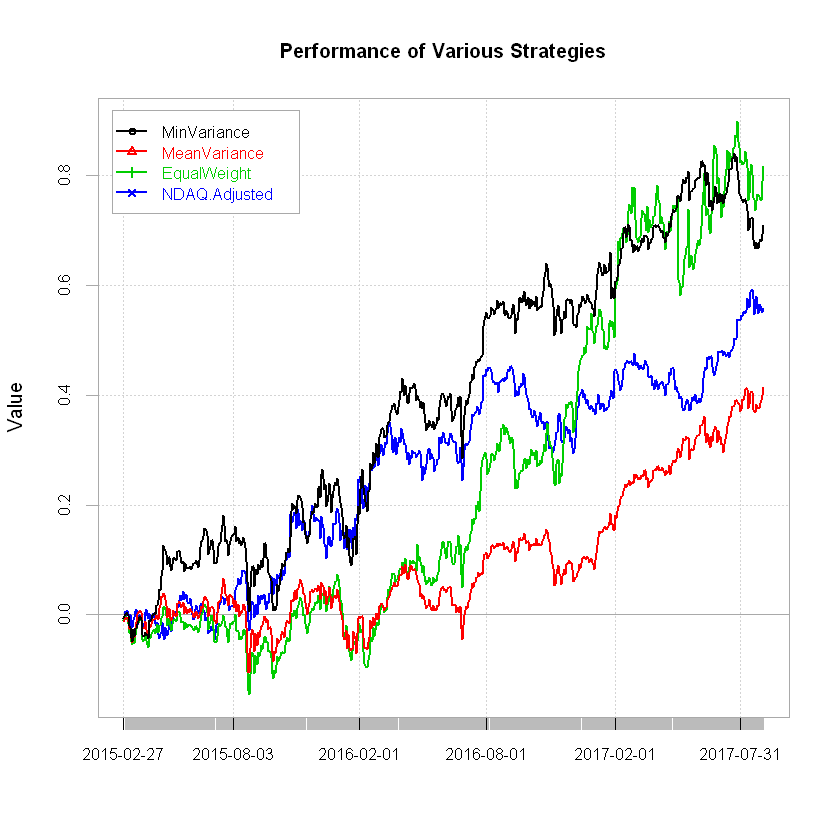

In [64]:
chart.CumReturns(PortfolioComparisonData,main='Performance of Various Strategies',legend.loc='topleft')

In [65]:
table.AnnualizedReturns(PortfolioComparisonData)
maxDrawdown(PortfolioComparisonData)
table.CAPM(PortfolioComparisonData[,1:3],
PortfolioComparisonData[,4])[c(2,6,9,10,11,12),]

,MinVariance,MeanVariance,EqualWeight,NDAQ.Adjusted
Annualized Return,0.2376,0.1545,0.2547,0.2063
Annualized Std Dev,0.1946,0.1759,0.2292,0.1861
Annualized Sharpe (Rf=0%),1.2205,0.8786,1.1116,1.1087


,MinVariance,MeanVariance,EqualWeight,NDAQ.Adjusted
Worst Drawdown,0.1473519,0.1605149,0.1610984,0.1095898


,MinVariance to NDAQ.Adjusted,MeanVariance to NDAQ.Adjusted,EqualWeight to NDAQ.Adjusted
Beta,0.4760,0.4767,0.5049
Annualized Alpha,0.1504,0.0635,0.1617
Tracking Error,0.1989,0.1804,0.2284
Active Premium,0.0450,-0.0518,0.0484
Information Ratio,0.2265,-0.2871,0.2119
Treynor Ratio,0.4991,0.3242,0.5045
